<a href="https://colab.research.google.com/github/thatGreatSloth/Data-Eng-Beginner/blob/main/magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from  imblearn.over_sampling import  RandomOverSampler

In [7]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
display(df.head())

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [10]:
df['class'] = (df['class'] == "g").astype(int)
#turn g and h to numbers.

In [11]:
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


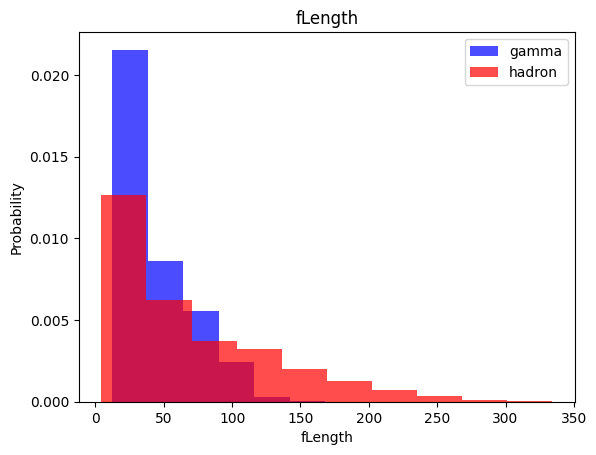

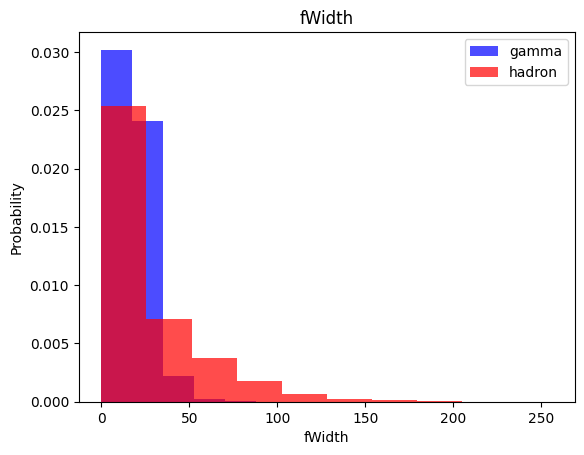

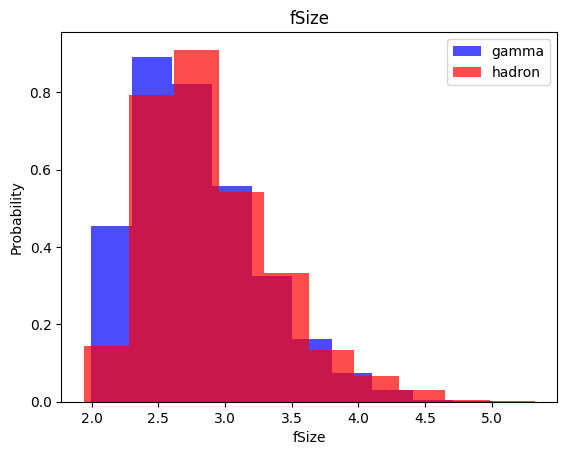

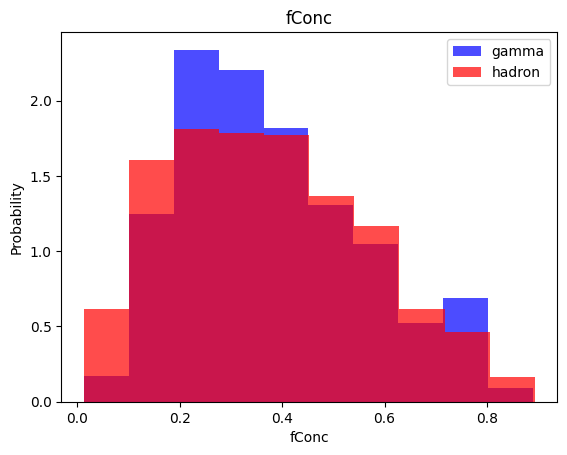

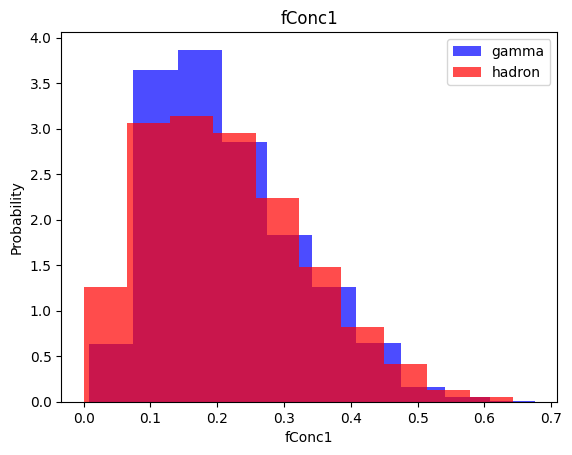

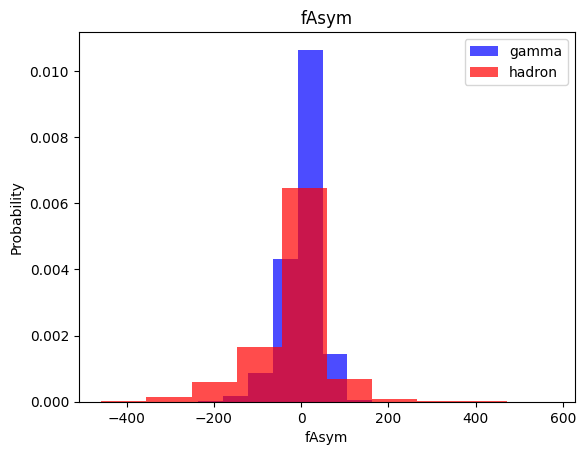

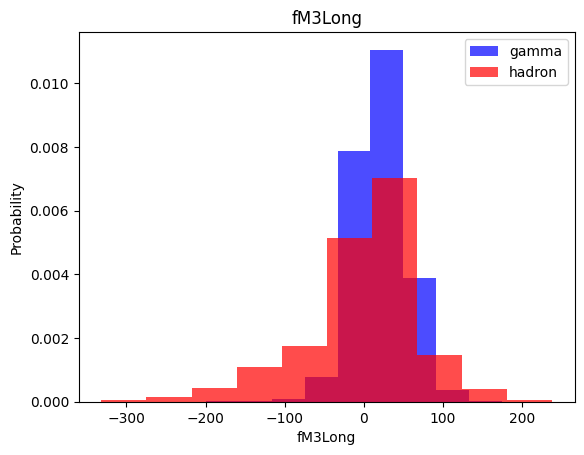

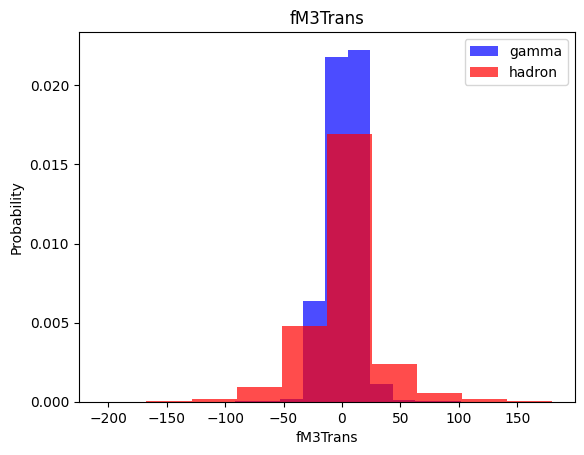

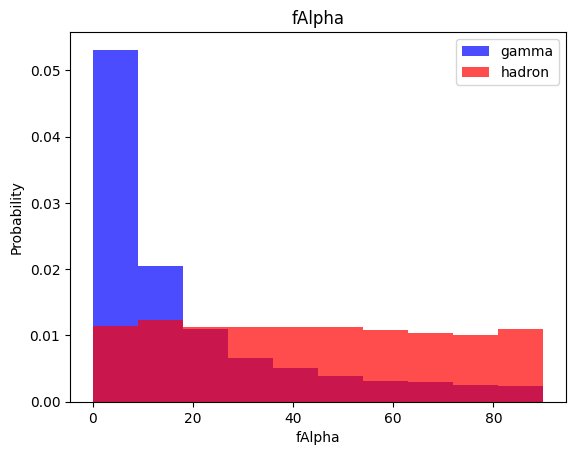

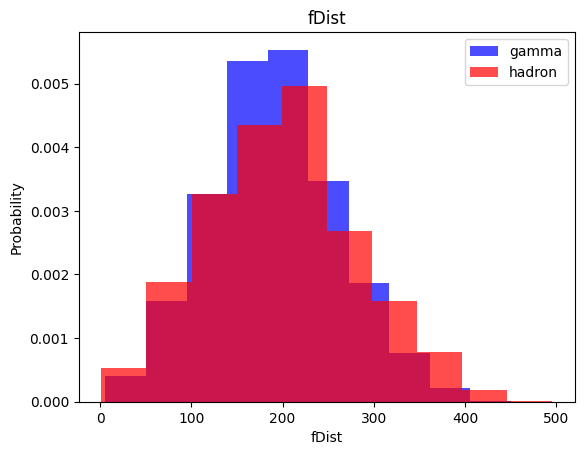

In [14]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()
  #all different values for class 1 for the labels

Train, Validation, Test

In [27]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
def scale_dataset(dataframe, oversample=False):
  # Get all columns except the last one (features)
  x = dataframe[dataframe.columns[:-1]].values
  # Get the last column (labels)
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  # Combine features and labels back into one array
  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [28]:
train_data, x_train, y_train = scale_dataset(train, oversample=True)
valid_data, x_valid, y_valid = scale_dataset(valid, oversample=False)
test_data, x_test, y_test = scale_dataset(test, oversample=False)

In [22]:
len(y_train)

14858

In [23]:
sum(y_train == 1)

np.int64(7429)

In [24]:
sum(y_train == 0)

np.int64(7429)

kNN

use of distance measure to find similarity and further classify.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [36]:
y_pred = knn_model.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1335
           1       0.83      0.89      0.86      2469

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes - primarily used for classification tasks. Its core principle is based on Bayes' Theorem, with a "naive" assumption that all features are conditionally independent of one another given the class label.

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [45]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1335
           1       0.74      0.90      0.81      2469

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



Logistic Regression - to predict the probability of a binary outcome (0 or 1, true/false, yes/no) based on input data. It is widely used in classification, such as predicting loan approval, disease diagnosis, or customer behavior (e.g., clicking a link).

In [69]:
nn_model = tf.keras.Sequential([ # Create a sequential model with a linear stack of layers
    tf.keras.layers.Input(shape=(10,)), # Define the input shape explicitly
    tf.keras.layers.Dense(32, activation='relu'), # First hidden layer: 32 neurons, ReLU activation
    tf.keras.layers.Dense(32, activation='relu'), # Second hidden layer: 32 neurons with ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer: 1 neuron with sigmoid activation for binary classification
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Use the Adam optimizer with a learning rate of 0.001
                 loss='binary_crossentropy', # Use binary crossentropy loss for binary labels (0 or 1)
                 metrics=['accuracy']) # Monitor accuracy during the training process

In [47]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [48]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))
#

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1335
           1       0.85      0.82      0.83      2469

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Support Vector Machines -  supervised machine learning models used primarily for classification and regression tasks by finding optimal hyperplanes to separate data classes. They are highly effective in high-dimensional spaces for applications such as image classification, text categorization, spam detection, bioinformatics, and fraud detection.

In [50]:
from sklearn.svm import SVC


In [51]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [52]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

##best accuracy given all classification models.

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1335
           1       0.90      0.90      0.90      2469

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



In [56]:
import tensorflow as tf

In [57]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [60]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      #randomly choose random node and dont train to prevent overfitting
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


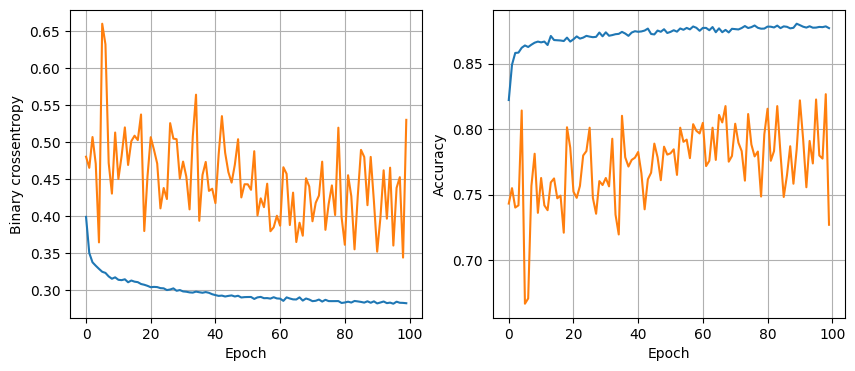

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.3785
16 nodes, dropout 0, lr 0.01, batch size 64


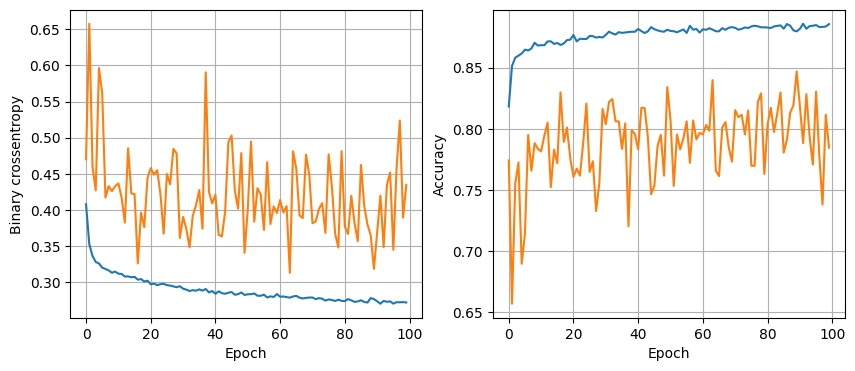

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3564
16 nodes, dropout 0, lr 0.01, batch size 128


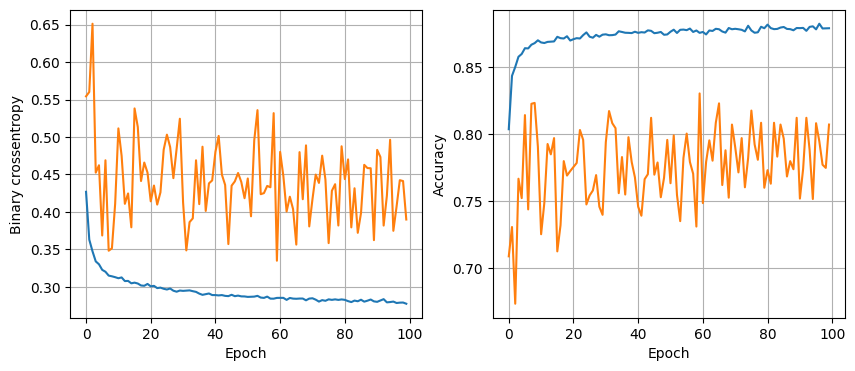

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.3601
16 nodes, dropout 0, lr 0.005, batch size 32


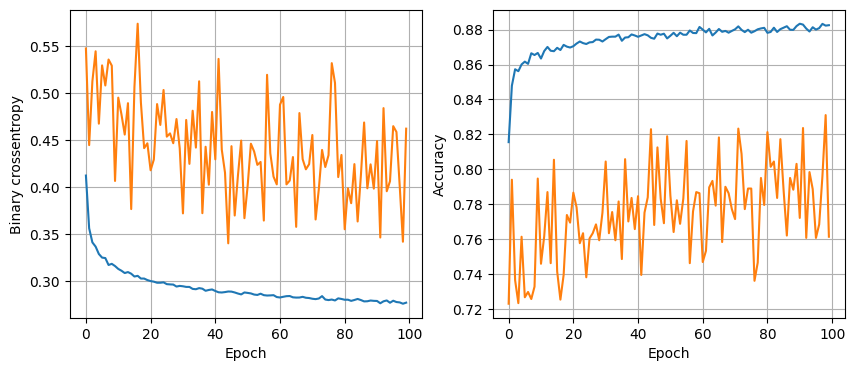

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8565 - loss: 0.3673
16 nodes, dropout 0, lr 0.005, batch size 64


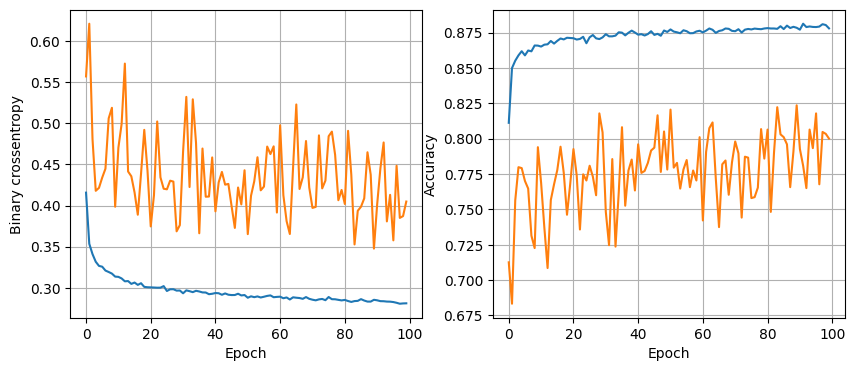

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.3596
16 nodes, dropout 0, lr 0.005, batch size 128


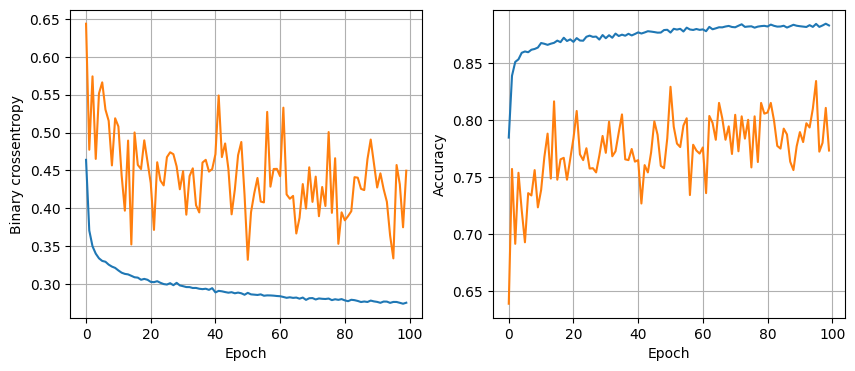

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3400
16 nodes, dropout 0, lr 0.001, batch size 32


KeyboardInterrupt: 

In [62]:
least_val_loss = float('inf') #initialised to infinifty
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

**Bikes- Regression**

In [63]:
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [73]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp",
                "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv", encoding='latin-1').drop(["Date", "Holiday", "Seasons"], axis=1)